Иногда нам приходится фильтровать данные в одной таблице на основании данных другой таблицы. Например, если нам нужно выбрать только те товары, которые кто-то когда-то покупал. Формально на языке базы данных это звучит так: «выбрать товары, для которых существует запись в таблице продаж».

Это можно сделать с помощью ключевого слова EXISTS, которое так и переводится — «существовать».

EXISTS возвращает:

⭐ TRUE, если результатом запроса является хотя бы одна строка;
⭐ FALSE, если не существует ни одной.
Давайте разберём на примере.

Итак, у нас есть таблица с данными о продуктах:

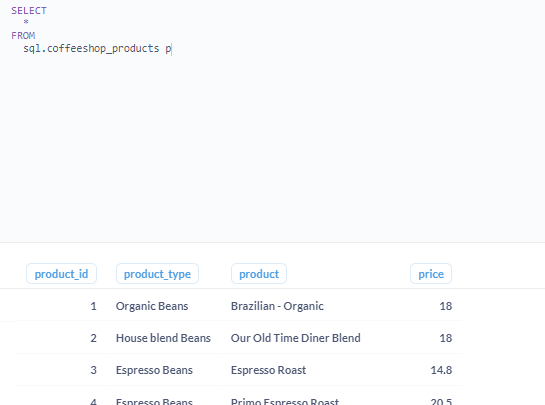

Выведите в алфавитном порядке уникальные названия товаров, которые приобретались хотя бы один раз.

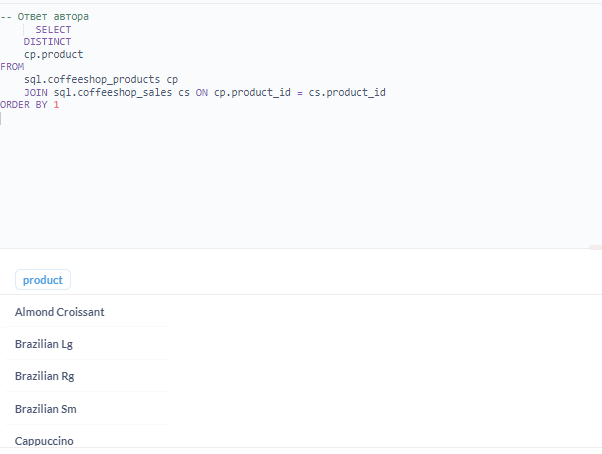

Некоторые запросы могут быть слишком тяжёлыми для ещё одного соединения, или, скажем, соединение таблиц может разрушить агрегацию.

В подобных случаях нам и пригодится конструкция EXISTS.

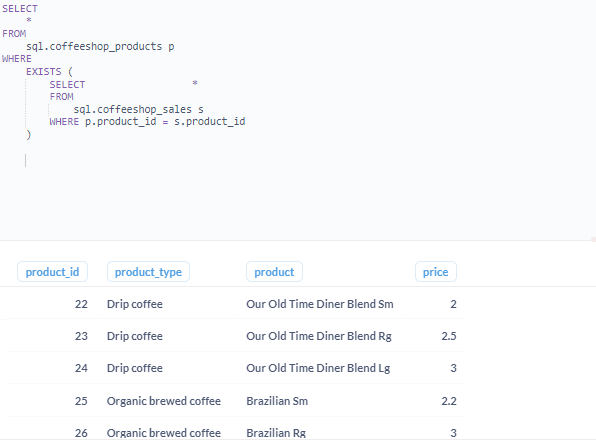

Давайте разберём этот код по частям.

Все части первого SELECT выглядят как обычно, кроме того, что в разделе WHERE после EXISTS идёт другой запрос. Внутри этого запроса неважен список полей: в нём будет считаться только количество строк в результате, с учётом условия p.product_id = s.product_id, то есть в таблице товаров будет проверяться наличие товаров в таблице с продажами.

Условие необязательно должно быть равенством, главное — чтобы результат его имел логический тип.

Таким образом, у нас в выборку попадают только те записи из головной таблицы, для которых выполняется условие в скобках WHERE, — в нашем случае только те записи, для которых есть данные о продаже.

Заметьте, нам не понадобилось ключевое слово DISTINCT, чтобы выбрать разные продукты, так как мы выбираем на основании уже готовой и чистой таблицы продуктов.

Обратите внимание, что в данном случае для БД не имеет значения, сколько продаж было, важен лишь сам факт — существовала ли хотя бы одна продажа для этого товара или нет.

Чтобы превратить наш запрос в противоположный, то есть вывести товары, которые не были проданы ни разу, нужно написать перед словом EXISTS слово NOT.

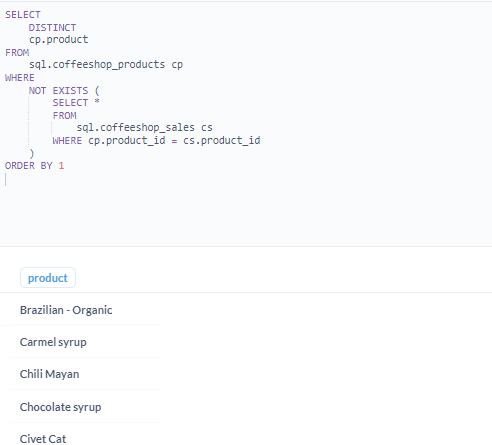

Для анализа портрета покупателя необходим список клиентов, совершавших покупки только онлайн. Напишите запрос, с помощью которого можно подсчитать количество таких покупателей cnt. Оставьте также и тех клиентов, для кого не указано, где они совершили покупку. Используйте конструкцию NOT EXISTS. Значения поля instore_flg: 'N' — онлайн-покупка, 'Y' — покупка в магазине, NULL — сведений о месте покупки нет.

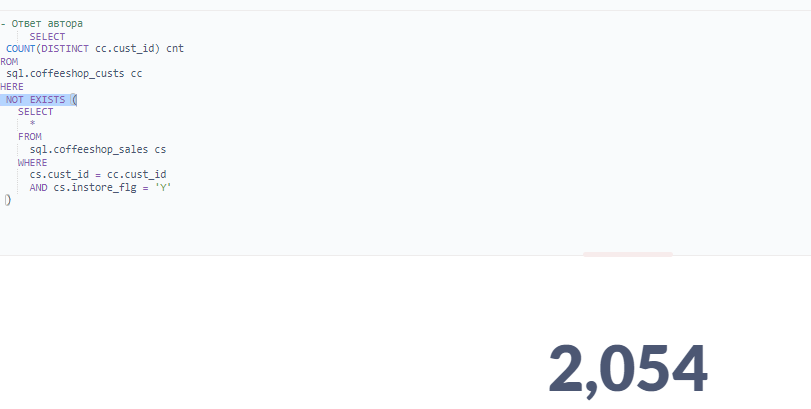

C помощью оператора IN в разделе WHERE можно комбинировать условия выбора значений.

Так может выглядеть запрос с выбором определённых типов товаров:

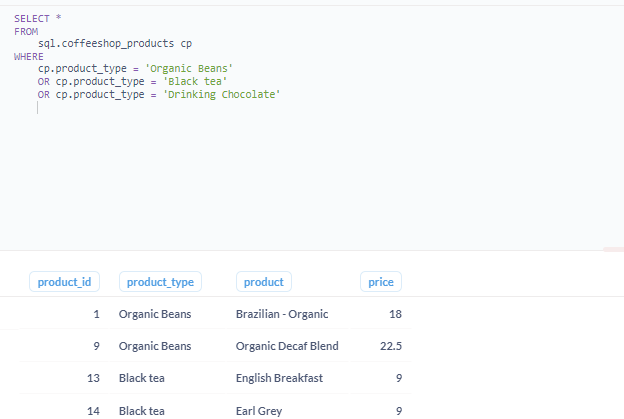

Его можно переписать с помощью оператора IN, указав список необходимых типов товаров через запятую.

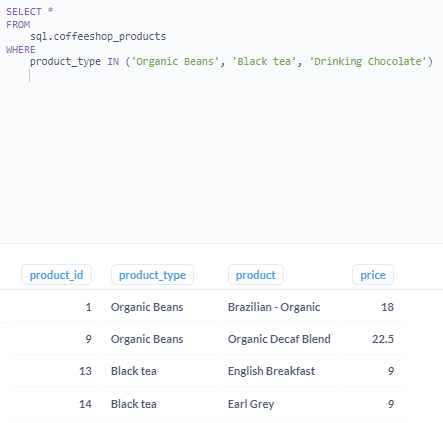

Также после оператора IN можно ввести подзапросы, чтобы сформировать список значений. Например, можно вывести данные о покупках, совершённых мужчинами.

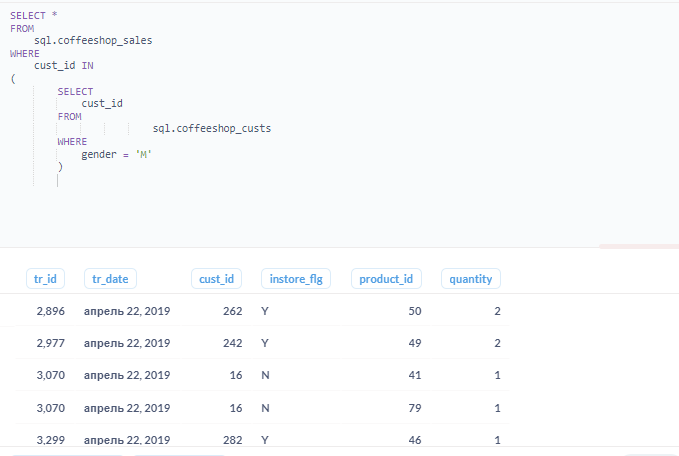

Синтаксис следующий: после названия поля пишется оператор IN, за ним — запрос, возвращающий любое количество строк, но обязательно только один столбец того же типа, что и фильтруемый.

В нашем случае cust_id может быть отфильтрован только другим целочисленным подзапросом.

Если бы в SELECT после IN был текст, дата или любой другой тип данных, результатом стала бы ошибка несоответствия типов. Замените cust_id в подзапросе на символ * и получите сообщение о том, что в подзапросе слишком много колонок.

Как и при EXISTS, для отрицания IN перед ним добавляется NOT.

Оператор IN удобно использовать, когда есть несколько мест, из которых вы собрали перечень нужных значений и хотите отфильтровать целевую таблицу.

Выберите имена клиентов, которые купили более трёх различных товаров. В решении используйте конструкцию IN. Отсортируйте список в алфавитном порядке.

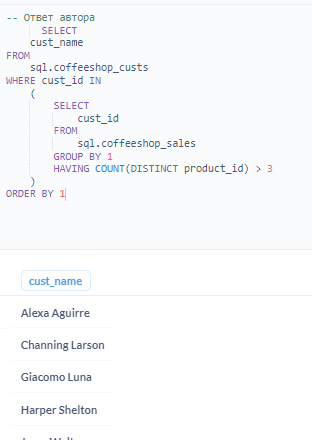

Вы познакомились с конструкцией SELECT FROM SELECT и основными принципами её использования. Посмотрим, что ещё можно делать с её помощью.

Подзапросом, или временной таблицей, может стать любой запрос — точно такой же, как и основной запрос. Это гибкий механизм, который можно использовать достаточно широко.

Мы научились выбирать поля из этих подзапросов, добавлять их в фильтры, теперь можно попробовать использовать такую временную таблицу-подзапрос в соединениях.

К подзапросам, записанным через SELECT FROM SELECT, можно также присоединять другие таблицы и использовать все уже изученные синтаксические операторы, например JOIN.

Давайте посмотрим, как это работает.

Для присоединения временной таблицы работает та же логика, что и для обычной: мы просто подставляем подзапрос на место, где должно быть предполагаемое название таблицы. Поскольку готовой таблицы у нас нет, мы вынуждены добавлять скобки, алиас и подзапрос внутри них. При этом смысл остаётся прежним: за скобками SQL видит лишь готовую таблицу и её колонки.

Допустим, мы хотим сравнить средний чек по каждому дню со средним чеком за все дни.

Для начала рассчитаем сумму для каждого чека и средний чек по дням, написав уже знакомый запрос.

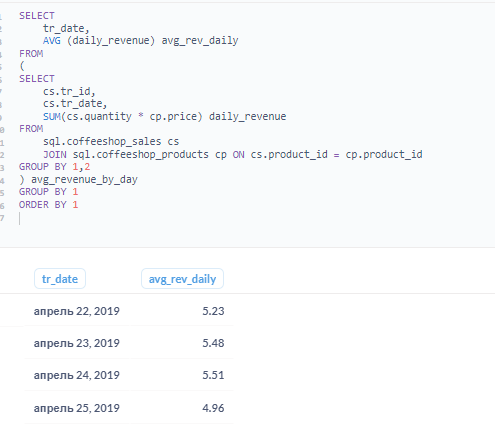

Затем напишем запрос, который рассчитает средний чек за все дни.

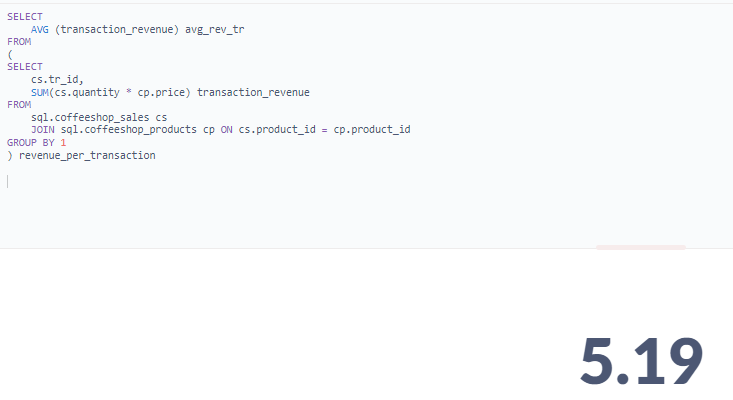

Теперь у нас есть два запроса: в одном рассчитан средний чек по дням, в другом — за все дни. Осталось объединить полученные запросы по знакомым правилам JOIN.

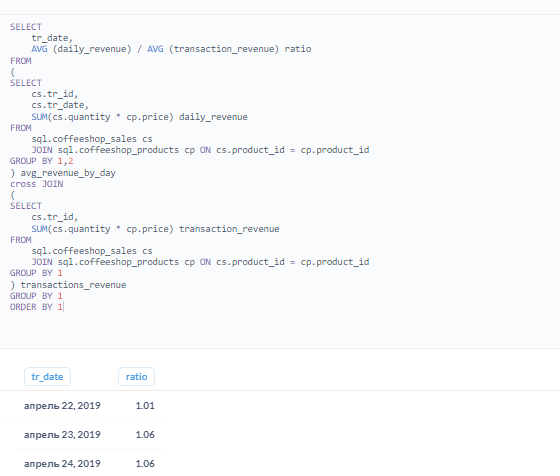

Поставим следующую задачу: сравнить сумму по каждой транзакции со средним чеком за этот день.

Выполним её в несколько этапов.

Необходимо предоставить данные по суммам каждого чека в формате: Id, дата, сумма. Напишите запрос для решения задачи, отсортируйте его по id транзакции.

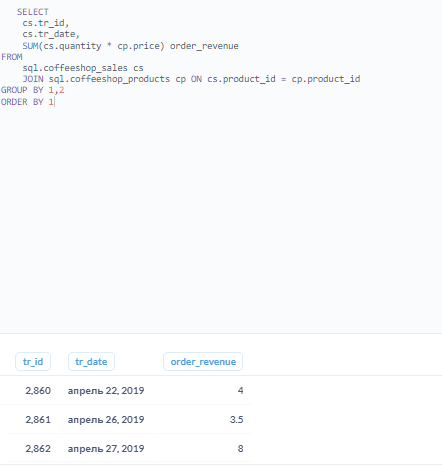

Напишите запрос, который выведет

id транзакции;

дату транзакции;

сумму транзакции;

средний чек (среднюю сумму транзакции);

соотношение суммы транзакции и средней суммы транзакции за этот день (столбец ratio).
Отсортируйте запрос по id транзакции.

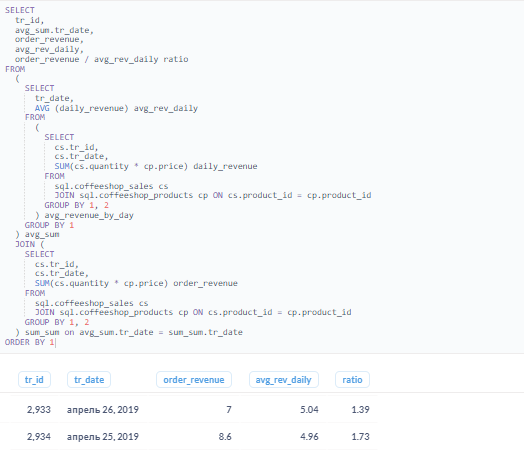

Вместо больших ступенчатых запросов в большинстве СУБД используются CTE.

CTE (от англ. Common Table Expressions, общие табличные выражения) — это такой вид подзапросов, который позволяет переиспользовать запросы несколько раз.
И действительно, CTE — это так называемый «синтаксический сахар», то есть конструкция, которая делает код более простым и понятным, более читаемым.

CTE легко можно преобразовать в подзапрос, а подзапрос — в CTE.

Закономерный вопрос: что же тогда использовать?

Есть простое правило: если вы абсолютно уверены, что вы пишите код только для себя, то можете использовать подзапрос. Если ваш код потом кто-то будет читать или проверять — используйте CTE.

Ну, а теперь попробуем разобраться, что это такое и как оно работает.

Обратимся к аналогиям. Представьте, что СТЕ — это своего рода  коробочка или обёртка, в которую помещается запрос со всеми SELECT, FROM, UNION, JOIN и т. д.

Зачем мы вообще упаковываем запросы? Чтобы потом иметь возможность к ним обращаться.

Здесь уже понадобится другое сравнение — с ящиками в шкафу, куда вы убираете вещи, а потом при необходимости открываете и достаёте. Точно так же вы можете открыть CTE и взять оттуда результаты запроса, который там хранится.

Конструкции СТЕ записываются так:

WITH название_CTE AS (...)

где

WITH — это ключевое слово, которое пишется перед СТЕ. Если в вашем скрипте присутствует несколько СТЕ, то ключевое слово ставится только перед первым, все последующие отделяются друг от друга запятыми.

название_CTE — название CTE. Может быть любым, но желательно, чтобы оно всё-таки было осмысленным и информативным: так вы поймёте, что хранится в СТЕ, какой запрос и какую задачу оно решает.

AS — ключевое слово, которое нужно использовать всегда; работает аналогично алиасам столбцов. С его помощью вы задаёте псевдоним названия_CTE для какого-то запроса.

(...) — в круглых скобках содержится непосредственно запрос.

Вернёмся к задаче по расчёту среднего чека за каждый день.

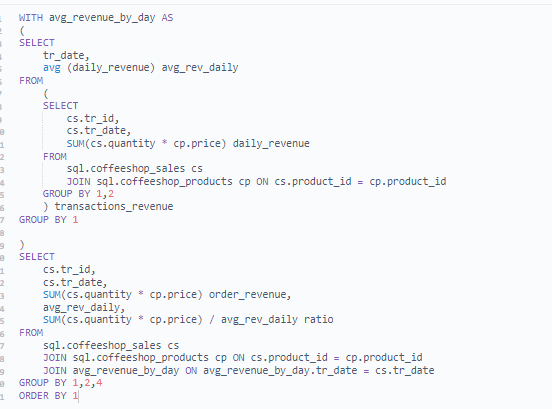

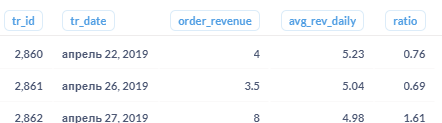

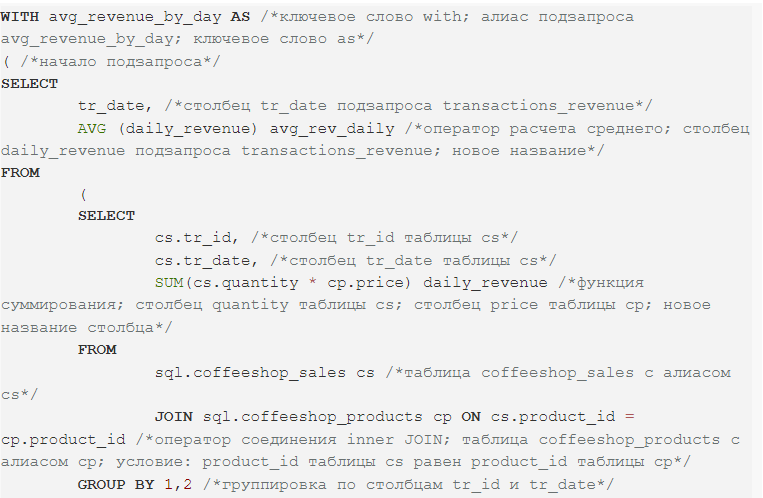

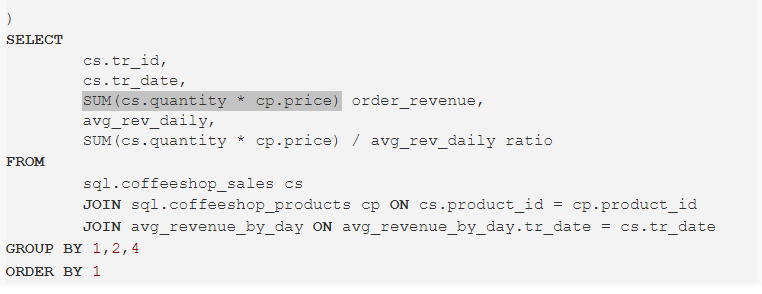

Количество подзапросов и их вложенность неограниченны: после объявления CTE их можно использовать в других CTE и SELECT любое количество раз.

Важно! При множественных подзапросах рекомендуется придерживаться одного стиля в рамках запроса. Если делаете вложенность, то сохраняйте её — не пишите блок с WITH. И наоборот, использование WITH делает неудобным включение вложенных запросов.
Стоит иметь ввиду, что конструкции с WITH читаются сверху вниз. То есть SQL сначала создаёт временную таблицу по первому CTE, потом по второму, третьему и т. д.

Также есть возможность использовать результаты предыдущего CTE в последующем.

Посмотрим, как использовать несколько CTE в одном запросе.

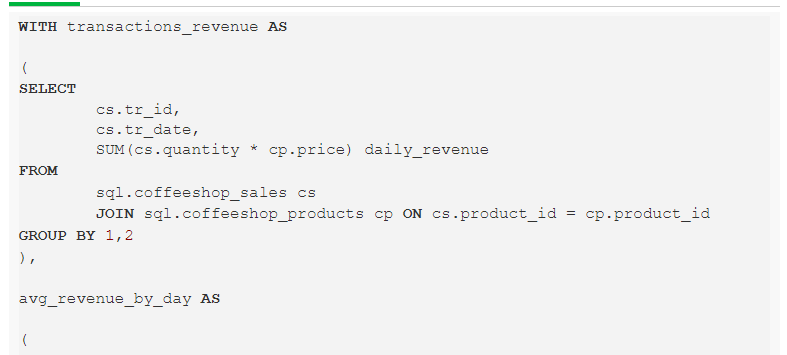

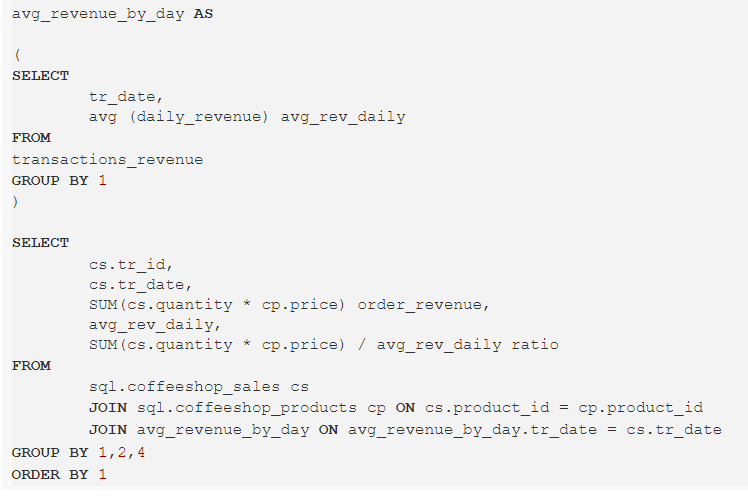

Как видите, несколько CTE разделяются запятыми, а каждое следующее выражение указывается с названием и запросом и повторяется необходимое количество раз.

Также видно, что в CTE avg_revenue_by_day мы использовали результат CTE transactions_revenue. Таким способом можно разбивать подзапросы на логические части.

Табличные выражения, как и вложенные запросы, часто используются с UNION: так можно описать логику, отсутствующую в базе, и применить её к существующим данным.

Поставим следующую задачу: сравнить выручку по всем кофейным товарам (кофе в зернах, кофейные напитки и др.) и по чайным товарам (чайные напитки, чай в пакетиках и др.). В готовых таблицах нет данных о категории каждого товара, значит, мы создадим временную, где добавим тип продукта (product_type).

Для начала посмотрим на исходные данные таблицы sql.coffeeshop_products и определим, по каким параметрам можно определить тип продукта.

На основе таблицы кофейные товары выявляются по нескольким условиям:

product_type содержит Beans, Coffee или Barista Espresso;

product содержит поле Latte (так как есть два напитка в строках с product_type = Seasonal Drinks с названием Pumpkin Latte)

Чайные товары можно определить по условию «product_type содержит tea».

С условиями нам поможет оператор ILIKE. Он работает по тому же принципу, что и LIKE, который вы использовали в модуле Основы SQL, — ищет строки по шаблону, но при этом не учитывает регистр строк. То есть с помощью условия ILIKE 'tea' мы найдём строки в любом регистре: Tea, tea, TEA, teA и т. д.

С помощью конструкции WITH AS и оператора ILIKE создадим свой справочник чайных и кофейных продуктов по описанным условиям.

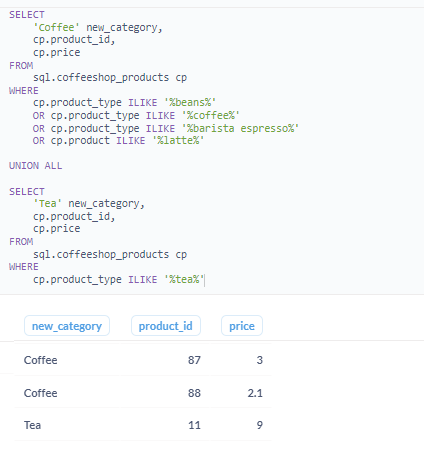

Затем рассчитаем выручку по новым категориям товаров.

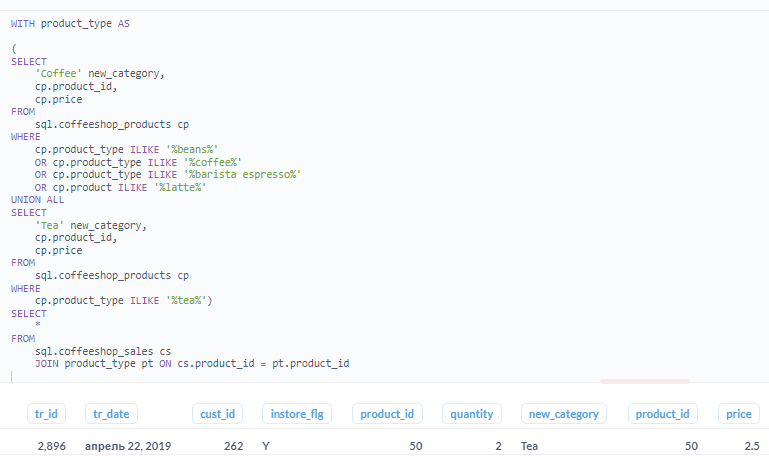

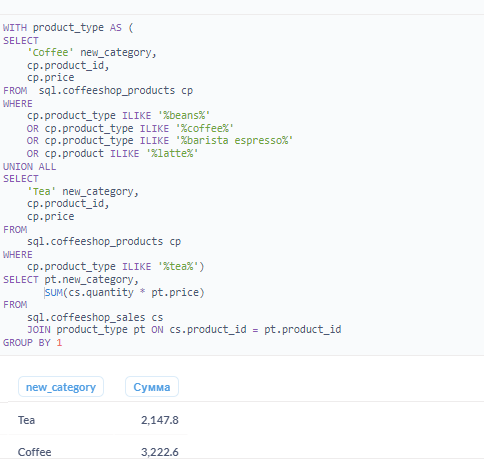

Для товарного исследования необходимо предоставить данные о сумме продаж по напиткам (Drinks) и выпечке (Foods) в формате: категория продукта, выручка. Напишите запрос для вывода необходимых данных, отсортируйте результат по сумме в порядке убывания. Напитки: product_type содержит chocolate / barista / brewed / drip / drink / syrup. Выпечка: product_type содержит pastry / scone / biscotti.

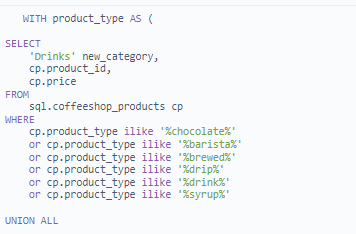

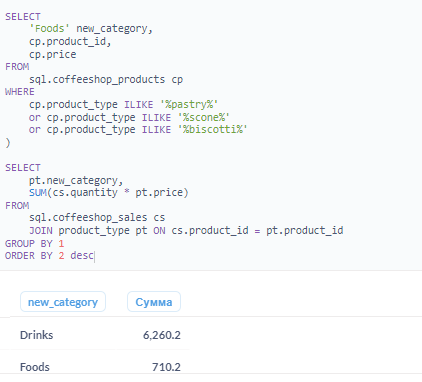

Для анализа портрета покупателя необходимо предоставить данные по клиентам, которые сначала совершили покупку онлайн, а потом пришли в кафе лично. Формате вывода: номер клиента, имя клиента.Отсортируйте запрос по id пользователя в порядке возрастания.

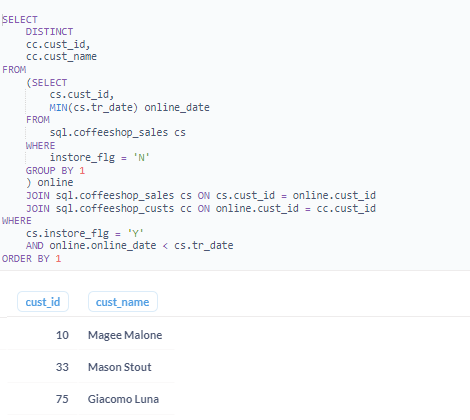

Вычислите сумму выручки по тем клиентам, которые покупают в среднем три и более товара (quantity) в одной транзакции. Примечание. Ответом системы на запрос должно быть одно число — сумма выручки.

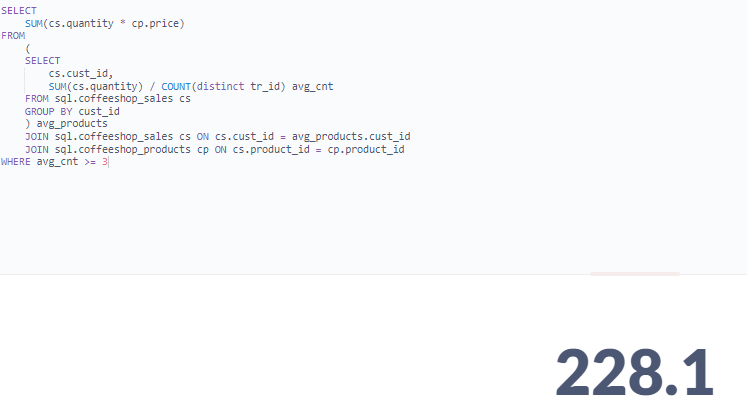

Для каждого дня вычислите количество чеков, в которых есть травяной чай (product_type содержит herbal). Напишите запрос и отсортируйте его по столбцу с датой в порядке возрастания.

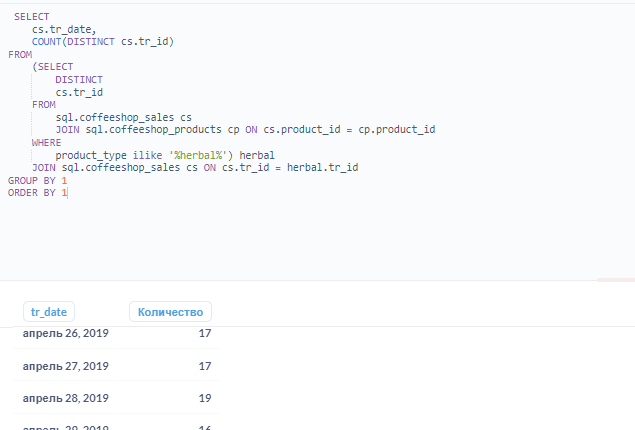